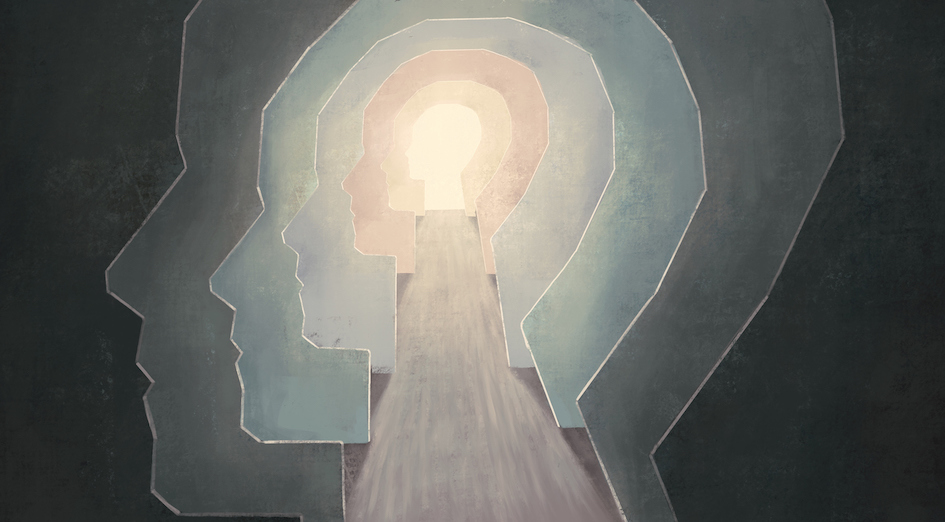

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [67]:
-- Run this code to save the CSV file as students
SELECT * 
FROM 'students.csv';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,222,None,None,None,None,None,None,None,None,None
282,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,249,None,None,None,None,None,None,None,None,None
283,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,203,None,None,None,None,None,None,None,None,None
284,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,247,None,None,None,None,None,None,None,None,None


In [68]:
-- Counting all records in the data
SELECT COUNT(*) AS total_records
FROM students

,total_records
0,286


In [69]:
-- Counting all records per student type
SELECT inter_dom, COUNT(*) as count_inter_dom
FROM students
GROUP BY inter_dom

,inter_dom,count_inter_dom
0,Inter,201
1,Dom,67
2,None,18


In [70]:
-- Filtering the data to see how it differs between student types
SELECT *
FROM students
WHERE inter_dom = 'Dom'

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Dom,JAP,Female,Grad,27.0,5.0,2.0,Medium,3.0,Average,3.0,Average,Yes,Yes,No,Yes,Major,12.0,Mod,47.0,16.0,11.0,5.0,8.0,7.0,3.0,31.0,81.0,7.0,3.0,7.0,1.0,6.0,6.0,1.0,5.0,4.0,1.0,NaN,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,No
1,Dom,JAP,Female,Under,18.0,1.0,1.0,Short,5.0,High,3.0,Average,No,No,No,No,No,9.0,Mild,48.0,9.0,4.0,5.0,4.0,3.0,2.0,10.0,37.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,No,No,No,No,No,No,No,No,No,No,No
2,Dom,JAP,Female,Under,21.0,3.0,3.0,Medium,5.0,High,3.0,Average,Yes,No,No,No,No,7.0,Mild,40.0,16.0,8.0,10.0,8.0,6.0,4.0,20.0,72.0,6.0,6.0,7.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,4.0,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No
3,Dom,JAP,Male,Under,20.0,2.0,3.0,Medium,5.0,High,1.0,Low,No,No,No,No,No,3.0,Min,47.0,11.0,4.0,5.0,4.0,5.0,2.0,12.0,43.0,1.0,5.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,No,Yes,Yes,No,No,No,No,No,No,No,No
4,Dom,JAP,Female,Under,21.0,3.0,3.0,Medium,5.0,High,1.0,Low,No,No,Yes,Yes,Other,10.0,Mod,48.0,8.0,4.0,5.0,4.0,3.0,2.0,10.0,36.0,7.0,5.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes,Yes,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Dom,JAP,Female,Under,21.0,3.0,4.0,Long,5.0,High,4.0,High,No,Yes,No,No,No,8.0,Mild,27.0,16.0,9.0,10.0,8.0,7.0,4.0,20.0,74.0,1.0,7.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,6.0,No,Yes,Yes,No,No,No,No,No,No,No,Yes
63,Dom,JAP,Female,Under,22.0,3.0,3.0,Medium,3.0,Average,4.0,High,Yes,Yes,No,No,No,2.0,Min,48.0,8.0,10.0,5.0,4.0,3.0,4.0,16.0,50.0,7.0,7.0,7.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No
64,Dom,JAP,Female,Under,19.0,2.0,1.0,Short,5.0,High,3.0,Average,No,No,No,No,No,9.0,Mild,47.0,8.0,7.0,5.0,5.0,3.0,2.0,13.0,43.0,5.0,7.0,7.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,2.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
65,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,3.0,Average,No,No,No,No,No,1.0,Min,43.0,8.0,12.0,5.0,4.0,3.0,2.0,10.0,44.0,7.0,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


In [71]:
-- Filtering the data to see how it differs between student types
SELECT *
FROM students
WHERE inter_dom = 'Inter'

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Inter,SEA,Male,Under,21.0,3.0,3.0,Medium,4.0,High,4.0,High,Yes,Yes,No,No,No,6.0,Mild,37.0,23.0,8.0,11.0,8.0,6.0,4.0,22.0,82.0,3.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0,6.0,4.0,4.0,No,No,No,No,No,No,No,No,Yes,No,No
197,Inter,SEA,Female,Under,20.0,2.0,1.0,Short,2.0,Low,4.0,High,Yes,No,No,No,No,7.0,Mild,16.0,29.0,18.0,17.0,17.0,12.0,8.0,44.0,145.0,7.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,7.0,1.0,4.0,Yes,No,No,No,No,No,No,No,Yes,No,No
198,Inter,SEA,Female,Under,21.0,3.0,3.0,Medium,2.0,Low,5.0,High,Yes,No,No,Yes,Major,16.0,ModSev,25.0,24.0,11.0,17.0,4.0,11.0,6.0,37.0,110.0,5.0,7.0,3.0,1.0,6.0,1.0,6.0,1.0,4.0,1.0,3.0,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No
199,Inter,SEA,Female,Under,18.0,1.0,1.0,Short,1.0,Low,4.0,High,No,No,No,No,No,8.0,Mild,38.0,11.0,12.0,10.0,4.0,7.0,4.0,20.0,68.0,5.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes


In [72]:
SELECT *
FROM students
WHERE inter_dom IS NULL

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,96,42,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,128,137,66,61,30,46,19,65,21,45
2,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,172,54,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,140,131,202,207,238,222,249,203,247,223
3,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,172,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,128,137,66,61,30,46,19,65,21,45
5,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,140,131,202,207,238,222,249,203,247,223
6,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,123,None,None,None,None,None,None,None,None,None
8,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,140,None,None,None,None,None,None,None,None,None
9,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,131,None,None,None,None,None,None,None,None,None


In [73]:
-- Finding the summary statistics for all diagnostic tests
SELECT inter_dom,
    ROUND(MIN(todep),2) AS min_phq, ROUND(MAX(todep),2) AS max_phq, ROUND(AVG(todep),2) AS avg_phq,
    ROUND(MIN(tosc),2) AS min_sc, ROUND(MAX(tosc),2) AS max_sc, ROUND(AVG(tosc),2) AS avg_sc,
    ROUND(MIN(toas),2) AS min_as, ROUND(MAX(toas),2) AS max_as, ROUND(AVG(toas),2) AS avg_as
FROM students
GROUP BY inter_dom

,inter_dom,min_phq,max_phq,avg_phq,min_sc,max_sc,avg_sc,min_as,max_as,avg_as
0,Inter,0.0,25.0,8.04,11.0,48.0,37.42,36.0,145.0,75.56
1,Dom,0.0,23.0,8.61,8.0,48.0,37.64,36.0,112.0,62.84
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
-- Repeating the above to international students
SELECT inter_dom, 
    ROUND(MIN(todep),2) AS min_phq, ROUND(MAX(todep),2) AS max_phq, ROUND(AVG(todep),2) AS avg_phq,
    ROUND(MIN(tosc),2) AS min_sc, ROUND(MAX(tosc),2) AS max_sc, ROUND(AVG(tosc),2) AS avg_sc,
    ROUND(MIN(toas),2) AS min_as, ROUND(MAX(toas),2) AS max_as, ROUND(AVG(toas),2) AS avg_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY inter_dom

,inter_dom,min_phq,max_phq,avg_phq,min_sc,max_sc,avg_sc,min_as,max_as,avg_as
0,Inter,0.0,25.0,8.04,11.0,48.0,37.42,36.0,145.0,75.56


In [75]:
-- Checking the impact of length of stay on the average diagnostic scores for international students
SELECT stay,
    ROUND(AVG(todep),2) AS average_phq,
    ROUND(AVG(tosc),2) AS average_scs,
    ROUND(AVG(toas),2) AS average_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC

,stay,average_phq,average_scs,average_as
0,10.0,13.00,32.00,50.00
1,8.0,10.00,44.00,65.00
2,7.0,4.00,48.00,45.00
3,6.0,6.00,38.00,58.67
4,5.0,0.00,34.00,91.00
5,4.0,8.57,33.93,87.71
6,3.0,9.09,37.13,78.00
7,2.0,8.28,37.08,77.67
8,1.0,7.48,38.11,72.80
